# Unit 5 - Financial Planning

In [69]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [70]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [71]:
# Set current amount of crypto assets
crypto_positions = {"position" : [1,10]
                   }
cryptos = ["BTC", "ETH"]

df_cryptos = pd.DataFrame(crypto_positions, index=cryptos)
df_cryptos = df_cryptos.astype('int64')
df_cryptos

,position
BTC,1
ETH,10


In [72]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [73]:
response_btc = requests.get(btc_url).json()
response_eth = requests.get(eth_url).json()
response_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120041125,
   'total_supply': 120041125,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2844.57,
     'volume_24h': 11147353360,
     'market_cap': 341205744078,
     'percentage_change_1h': 0.313541784069294,
     'percentage_change_24h': -3.64220227865631,
     'percentage_change_7d': 10.2779776734437,
     'percent_change_1h': 0.313541784069294,
     'percent_change_24h': -3.64220227865631,
     'percent_change_7d': 10.2779776734437},
    'CAD': {'price': 3586.149399,
     'volume_24h': 14053468380.952,
     'market_cap': 430158081559.134,
     'percent_change_1h': 0.313541784069294,
     'percent_change_24h': -3.64220227865631,
     'percent_change_7d': 10.2779776734437}},
   'last_updated': 1647803295}},
 'metadata': {'timestamp': 1647803295,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [74]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = response_btc['data']['1']['quotes']['USD']['price']
btc_price

41226.0

In [75]:
# Fetch current ETH price
# YOUR CODE HERE!
eth_price = response_eth['data']['1027']['quotes']['USD']['price']
eth_price

2844.57

In [76]:
# Compute current value of my crpto
# YOUR CODE HERE!
btc_pos = df_cryptos.loc['BTC']
btc_pos = float(btc_pos)
eth_pos = df_cryptos.loc['ETH']
eth_pos = float(eth_pos)

In [77]:
my_btc = btc_price * btc_pos
my_eth = eth_price * eth_pos

# Print current crypto wallet balance
print(f"The current value of your {btc_pos} BTC is ${my_btc:.02f}")

print(f"The current value of your {eth_pos} ETH is ${my_eth:.02f}")
     

The current value of your 1.0 BTC is $41226.00
The current value of your 10.0 ETH is $28445.70


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [78]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [79]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [80]:
! conda list alpaca

# packages in environment at /opt/anaconda3/envs/dev:
#
# Name                    Version                   Build  Channel
alpaca-trade-api          1.5.1                    pypi_0    pypi


In [81]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-03-17", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    tradeapi.TimeFrame(1,tradeapi.TimeFrameUnit.Day), "2021-03-11", "2021-03-11"
    #timeframe,
    #start = today,
    #end = today,
    #limit = 1000
).df

#df_portfolio = df_portfolio.set_index('symbol')

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-03-11 05:00:00+00:00,114.47,114.54,114.295,114.44,8827893,18899,114.444734,AGG
2021-03-11 05:00:00+00:00,392.24,395.65,391.740,393.46,86247637,489448,393.229094,SPY


In [82]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_price = float(df_portfolio.iloc[0]["close"])
spy_price = float(df_portfolio.iloc[1]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $114.44
Current SPY closing price: $393.46


In [83]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_price * my_spy
my_agg_value = agg_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19673.00
The current value of your 200 AGG shares is $22888.00


### Savings Health Analysis

In [84]:
# Set monthly household income
# YOUR CODE HERE!
my_income = 20000
# Consolidate financial assets data
# YOUR CODE HERE!
my_shares = my_spy_value + my_agg_value
my_crypto = my_eth + my_btc

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame()
df_savings['source'] = ['crypto', 'shares']
df_savings['amount'] = [my_crypto, my_shares]
df_savings=df_savings.set_index('source')

# Display savings DataFrame
df_savings

,amount
source,
crypto,69671.7
shares,42561.0


array([<AxesSubplot:ylabel='amount'>], dtype=object)

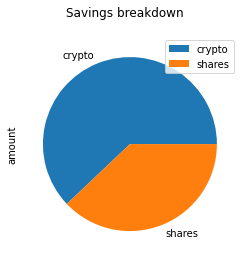

In [85]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True, title="Savings breakdown")

In [89]:
# Set ideal emergency fund
emergency_fund = my_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_shares + my_crypto
total_savings


# Validate saving health
# YOUR CODE HERE!
if total_savings >= emergency_fund:
    print(f"Your savings of ${total_savings} exceeds emergency fund of ${emergency_fund}")
else:
    print("You are low on funds, oh no!")

Your savings of $112232.7 exceeds emergency fund of $60000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [90]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [92]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
# Set the ticker
ticker_one = ["SPY"]
ticker_two = ["AGG"]


timeframe = "1Day"

spy_stock_data = alpaca.get_bars(
    ticker_one,
    tradeapi.TimeFrame(1,tradeapi.TimeFrameUnit.Day), "2016-03-11", "2021-03-11",
    ).df

agg_stock_data = alpaca.get_bars(
    ticker_two,
    tradeapi.TimeFrame(1,tradeapi.TimeFrameUnit.Day), "2016-03-11", "2021-03-11",
    ).df

spy_stock_data.columns = pd.MultiIndex.from_product([['spy_stock_data'], spy_stock_data.columns])
agg_stock_data.columns = pd.MultiIndex.from_product([['agg_stock_data'], agg_stock_data.columns])
df_stock_data = pd.concat([spy_stock_data, agg_stock_data], axis = 1)
df_stock_data


spy_stock_data                              \
                                    open      high       low   close   
timestamp                                                              
2016-03-11 05:00:00+00:00         201.25  202.8100  199.5179  202.76   
2016-03-14 04:00:00+00:00         202.20  203.0400  201.7700  202.50   
2016-03-15 04:00:00+00:00         201.32  202.5307  201.0500  202.17   
2016-03-16 04:00:00+00:00         201.62  203.8200  201.5500  203.34   
2016-03-17 04:00:00+00:00         203.26  205.2300  202.7700  204.63   
...                                  ...       ...       ...     ...   
2021-03-05 05:00:00+00:00         380.55  384.7600  372.6400  383.56   
2021-03-08 05:00:00+00:00         384.67  387.6800  381.4200  381.72   
2021-03-09 05:00:00+00:00         385.88  389.9100  381.7299  387.13   
2021-03-10 05:00:00+00:00         389.59  391.4000  388.1702  389.39   
2021-03-11 05:00:00+00:00         392.24  395.6500  391.7400  393.46   

                                                                     \
                              volume trade_count        vwap symbol   
timestamp                                                             
2016-03-11 05:00:00+00:00  137454028      426275  201.737210    SPY   
2016-03-14 04:00:00+00:00   73611949      297691  202.469856    SPY   
2016-03-15 04:00:00+00:00   93169058      322270  201.789674    SPY   
2016-03-16 04:00:00+00:00  128552379      497345  202.720820    SPY   
2016-03-17 04:00:00+00:00  134255005      424808  204.192743    SPY   
...                              ...         ...         ...    ...   
2021-03-05 05:00:00+00:00  152039642     1163089  379.145999    SPY   
2021-03-08 05:00:00+00:00  123144774      893819  384.704842    SPY   
2021-03-09 05:00:00+00:00  113633559      623523  387.280742    SPY   
2021-03-10 05:00:00+00:00  109899419      743869  389.624140    SPY   
2021-03-11 05:00:00+00:00   86247637      489448  393.229094    SPY   

                          agg_stock_data                                       \
                                    open      high       low   close   volume   
timestamp                                                                       
2016-03-11 05:00:00+00:00         109.65  109.7100  109.3900  109.42  2065008   
2016-03-14 04:00:00+00:00         109.49  109.6000  109.4501  109.48  2186892   
2016-03-15 04:00:00+00:00         109.68  109.7000  109.3800  109.38  1746182   
2016-03-16 04:00:00+00:00         109.39  109.8600  109.2863  109.85  1888538   
2016-03-17 04:00:00+00:00         109.95  110.1300  109.9000  110.08  4116539   
...                                  ...       ...       ...     ...      ...   
2021-03-05 05:00:00+00:00         114.17  114.3197  114.0500  114.28  8675825   
2021-03-08 05:00:00+00:00         114.20  114.2300  113.8300  113.83  5639472   
2021-03-09 05:00:00+00:00         114.20  114.3100  114.0000  114.26  5676798   
2021-03-10 05:00:00+00:00         114.30  114.5000  114.2750  114.45  6936954   
2021-03-11 05:00:00+00:00         114.47  114.5400  114.2950  114.44  8827893   

                                                          
                          trade_count        vwap symbol  
timestamp                                                 
2016-03-11 05:00:00+00:00        9017  109.455972    AGG  
2016-03-14 04:00:00+00:00       10641  109.515872    AGG  
2016-03-15 04:00:00+00:00        7599  109.468540    AGG  
2016-03-16 04:00:00+00:00        9995  109.517540    AGG  
2016-03-17 04:00:00+00:00       11303  110.056519    AGG  
...                               ...         ...    ...  
2021-03-05 05:00:00+00:00       23143  114.237029    AGG  
2021-03-08 05:00:00+00:00       16801  113.990252    AGG  
2021-03-09 05:00:00+00:00       15830  114.235286    AGG  
2021-03-10 05:00:00+00:00       20232  114.385338    AGG  
2021-03-11 05:00:00+00:00       18899  114.444734    AGG  

[1259 rows x 16 columns]

In [93]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

num_sims = 1000

#
MC_both = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [94]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_both

In [95]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_both.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickcorr/Bootcamp/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987842,1.000003,1.001098,1.001208,1.001746,1.000842,0.993008,1.010000,0.999009,0.992387,...,1.007681,0.994343,1.004695,1.007294,1.010868,0.993584,1.002163,0.996088,0.998051,0.998723
2,0.988760,1.003555,0.987914,1.001215,1.010206,0.991596,0.984294,1.011882,0.995248,0.992249,...,1.014680,1.003233,1.004411,1.006278,1.015177,0.994310,1.002900,1.002559,0.998545,1.003291
3,0.990606,0.996374,0.987327,1.003051,1.004212,0.992416,0.981780,1.020520,0.991289,0.995829,...,1.012633,1.000541,1.004800,1.009865,1.023630,0.991936,1.016208,1.007060,1.006154,1.007644
4,0.993802,1.004841,0.991036,1.012891,1.002487,0.995366,0.967509,1.026392,0.989970,1.000394,...,1.009505,1.002066,1.002655,1.006150,1.032011,0.984438,1.014800,0.998354,1.016523,1.009112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.053130,6.930523,12.496723,4.945279,10.897428,7.917599,7.188496,3.479650,6.321972,5.043758,...,4.655887,6.109561,6.815351,5.938783,5.732696,3.970185,9.056201,5.756945,2.700131,9.051606
7557,8.070828,6.961491,12.648167,4.883001,10.920554,7.872178,7.160383,3.465488,6.381797,5.069594,...,4.643036,6.156427,6.827304,5.895043,5.795166,4.014813,9.120217,5.697360,2.709631,9.012573
7558,8.076712,6.958373,12.645122,4.906042,10.888359,7.949703,7.212376,3.517124,6.401627,5.041469,...,4.642255,6.161352,6.878109,5.861941,5.827835,4.030458,9.168691,5.708683,2.733774,9.082831
7559,8.034593,6.928131,12.689860,4.876316,10.834207,8.039464,7.249948,3.512021,6.437593,5.032732,...,4.659655,6.207311,6.909835,5.850547,5.879204,4.013242,9.146104,5.676722,2.719168,9.076978


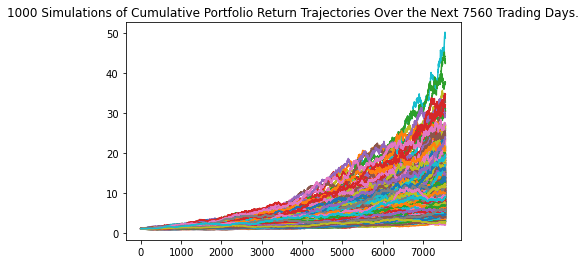

In [96]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_both.plot_simulation()

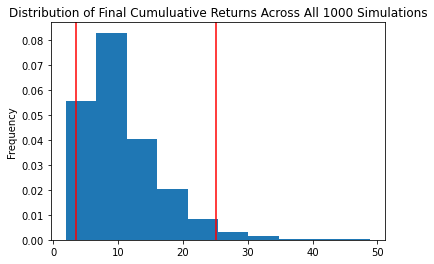

In [97]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_both.plot_distribution()

### Retirement Analysis

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_both.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean              10.722125
std                5.829218
min                1.946561
25%                6.512612
50%                9.304670
75%               13.587013
max               48.879875
95% CI Lower       3.535066
95% CI Upper      25.049220
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [99]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70701.33 and $500984.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [100]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106051.99 and $751476.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [101]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

num_sims = 1000

#
MC_early = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [102]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_early.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickcorr/Bootcamp/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000060,1.006927,1.004643,0.992203,1.007635,1.000003,0.996075,1.001688,1.008594,1.005135,...,1.002859,1.012241,0.987197,0.998990,0.994280,0.998097,0.999910,1.011857,1.005031,1.007843
2,1.002689,1.014412,1.013579,0.992973,1.016878,0.995171,0.994531,1.004650,1.012933,1.007684,...,1.013480,1.005272,0.977885,1.002746,1.000039,0.997348,0.998019,1.014261,1.010769,1.001443
3,1.009526,1.004586,1.010776,0.984832,1.008217,0.986801,0.990997,1.006490,1.017525,1.013768,...,1.001267,1.010189,0.968483,0.994270,0.999399,0.994228,1.000431,1.017036,1.018094,0.996457
4,1.007418,1.010674,1.008372,0.994460,1.010938,0.980409,0.992103,1.012123,1.022833,1.002299,...,1.002956,1.004761,0.968775,0.996627,0.994702,0.992625,0.995828,1.024183,1.026478,0.995102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.552598,1.482222,1.141115,1.896634,1.675755,1.857421,1.767522,2.108331,2.131404,1.193844,...,1.685181,1.084360,0.873815,1.770759,1.271131,1.596643,1.145127,1.641406,1.811045,1.417264
1257,1.556180,1.488620,1.138613,1.895579,1.670107,1.860452,1.752797,2.135557,2.125594,1.193372,...,1.699314,1.083560,0.878747,1.762624,1.260045,1.595528,1.148835,1.654593,1.801072,1.416703
1258,1.541194,1.485100,1.148332,1.916425,1.677518,1.867369,1.748179,2.146078,2.101691,1.198983,...,1.699278,1.096987,0.878260,1.768003,1.278629,1.599538,1.157130,1.648567,1.811952,1.398076
1259,1.535834,1.487225,1.142844,1.921831,1.670255,1.869966,1.747046,2.148999,2.101032,1.197678,...,1.688579,1.099783,0.867753,1.780593,1.291415,1.599699,1.156745,1.649972,1.808541,1.400792


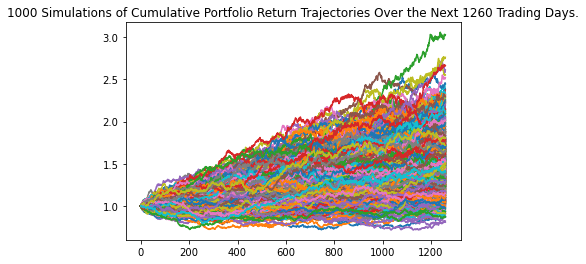

In [103]:
# Plot simulation outcomes
# YOUR CODE HERE!
early_line_plot = MC_early.plot_simulation()

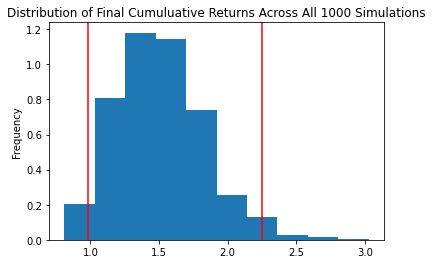

In [104]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
early_dist_plot = MC_early.plot_distribution()

In [105]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
early_tbl = MC_early.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(early_tbl)

count           1000.000000
mean               1.507159
std                0.319880
min                0.809347
25%                1.275591
50%                1.487118
75%                1.706853
max                3.028170
95% CI Lower       0.979120
95% CI Upper       2.247594
Name: 1260, dtype: float64


In [106]:
# Set initial investment
# YOUR CODE HERE!
initial_early_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*20000,2)
ci_upper_five = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_early_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $70701.33 and $500984.41


### Ten Years Retirement Option

In [107]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
num_sims = 1000

#
MC_early_10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [108]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_early_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickcorr/Bootcamp/NU-VIRT-FIN-PT-02-2022-U-LOL/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997681,0.997156,1.003908,1.000881,0.993674,1.007942,1.003324,0.998303,1.002996,1.001914,...,0.997841,1.005797,0.994015,0.993236,0.998241,1.005342,0.999534,1.000141,1.014319,0.999373
2,0.993060,0.982942,1.013090,0.992164,0.987476,1.008860,0.995515,0.999517,1.003253,1.008375,...,0.994937,1.018562,0.997367,1.009183,1.001150,1.010034,0.997270,1.000961,1.016057,1.001423
3,0.991006,0.980991,1.010889,1.000219,0.978042,1.009416,0.999128,0.999254,0.999435,1.008549,...,0.984241,1.018576,0.996959,1.010963,1.003433,1.017479,0.993320,1.001010,1.023016,0.996838
4,0.991304,0.975981,1.015749,1.002410,0.977089,1.010276,0.997517,1.010769,0.995312,1.002716,...,0.983026,1.017710,0.993236,1.016190,1.003878,1.018204,0.989753,1.011464,1.019289,0.998029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.997943,2.647738,1.900459,1.701171,1.341017,2.364124,2.662316,1.536676,1.510513,1.854128,...,2.603089,1.384015,3.227825,2.277283,2.295749,2.035020,2.198526,1.837193,1.819905,3.690670
2517,2.999709,2.648604,1.886599,1.707085,1.352166,2.370856,2.664297,1.550467,1.516271,1.851243,...,2.613067,1.398292,3.228058,2.299764,2.315439,2.034835,2.206849,1.839113,1.825772,3.696735
2518,3.010414,2.655135,1.917116,1.693637,1.348310,2.366833,2.685966,1.548406,1.529546,1.865279,...,2.600716,1.385452,3.202624,2.287110,2.302226,2.040843,2.207515,1.840161,1.827103,3.702852
2519,3.015458,2.649505,1.922892,1.696230,1.355509,2.351840,2.695782,1.544648,1.533459,1.858822,...,2.618489,1.400729,3.210042,2.299242,2.312729,2.047483,2.218513,1.854225,1.817706,3.670994


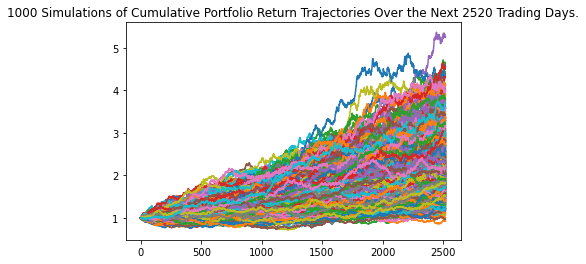

In [109]:
# Plot simulation outcomes
# YOUR CODE HERE!
early_10__line_plot = MC_early_10.plot_simulation()

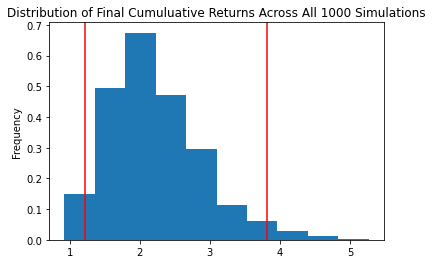

In [110]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
early_10_dist_plot = MC_early_10.plot_distribution()

In [111]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
early_10_tbl = MC_early_10.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(early_10_tbl)

count           1000.000000
mean               2.205642
std                0.657845
min                0.922379
25%                1.749963
50%                2.087621
75%                2.565678
max                5.265693
95% CI Lower       1.211483
95% CI Upper       3.818737
Name: 2520, dtype: float64


In [112]:
# Set initial investment
# YOUR CODE HERE!
initial_10_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*20000,2)
ci_upper_ten = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_10_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $70701.33 and $500984.41
